In [0]:
import sqlite3 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc 
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import TruncatedSVD

In [0]:
final = pd.read_csv("final.csv")

# Sampling the data

In [0]:
positive_reviews = final.loc[final["Score"] == "positive"]
negative_reviews = final.loc[final["Score"] == "negative"]

positive_reviews = positive_reviews.sample(n = 5000)
negative_reviews = negative_reviews.sample(n = 5000)

f1 = [positive_reviews, negative_reviews]
final_data = pd.concat(f1)

final_data = final_data.drop(["Text"], axis = 1)
final_data = final_data.drop(final_data.columns[0], axis = 1)

# Sorting the dataset based on 'time'

In [0]:
labels = final_data.Score

In [0]:
final_data = final_data.sort_values("Time")

In [49]:
final_data.shape

(10000, 10)

## Splitting the dataset into train and test data

In [0]:
n = final_data.shape[0]
train_size = 0.7

train_set = final_data.iloc[:int(n*train_size)]
test_set =final_data.iloc[int(n*train_size):]

X_train = train_set.CleanedText
y_train = train_set.Score

X_test = test_set.CleanedText
y_test= test_set.Score

In [11]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"don't", 'this', 'me', 'if', 'hers', 'at', 'should', 'from', 'now', 'myself', 'or', 'do', 'about', 'few', 'above', 'these', 'haven', 'hadn', "weren't", 'that', 're', 'those', 'ours', 'has', "she's", 'very', 'can', 'don', 'how', 'some', 'ourselves', 'am', 'couldn', 'needn', 'weren', 'with', 'down', 'was', 'his', 'she', 'between', 'once', 'any', 'more', "shan't", 'while', 'they', 'itself', 'into', 'so', 'only', 'did', "you'll", 'same', 'just', "wouldn't", 'will', 'i', 'my', 'below', 'aren', 'does', 'had', 'them', 'because', 'm', 'not', 'be', "it's", 'but', 'each', 'doesn', 'through', 'hasn', 'he', 'other', "wasn't", 'wasn', 'themselves', "won't", 've', 'on', 'shan', 'why', 'further', 'in', 'own', 't', 'we', 'mustn', 'been', 'herself', 'doing', 'when', 'to', "needn't", 'were', 'ain', 'yourselves', 'by', 'and', 'where', 'it', 'most', 'him', "isn't", 'didn', 'as', 'off', 'have', 'its', 'a', "should've", 'before', "couldn't", 'ma', 'against', 's', 'their', 'then', 'over', 'too', 'd', 'yours

# K-NN using 'Bag of Words' 

In [0]:
count_vect = CountVectorizer() #in scikit-learn
X_train1 = count_vect.fit_transform(X_train)
X_test1 = count_vect.transform(X_test)

In [13]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler(with_mean=False) 
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.




The optimal number of neighbors is 21.


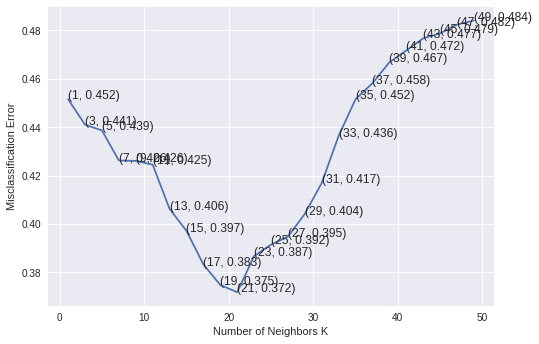

the misclassification error for each k value is :  [0.452 0.441 0.439 0.426 0.426 0.425 0.406 0.397 0.383 0.375 0.372 0.387
 0.392 0.395 0.404 0.417 0.436 0.452 0.458 0.467 0.472 0.477 0.479 0.482
 0.484]


In [14]:

from sklearn.model_selection import TimeSeriesSplit
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []
my_cv = [(train,test) for train, test in TimeSeriesSplit(n_splits=10).split(X_train1)]
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train1, y_train, cv = my_cv, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", (np.round(MSE,3)))

### Best 'k' = 21

In [0]:
k = 21
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train1,y_train)
pred = knn.predict(X_test1)


## Generate the confusion matrix 

In [22]:

import itertools
from sklearn.metrics import confusion_matrix
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
x = knn.predict(X_train1)
tr_acc = accuracy_score(y_train, x, normalize=True) * float(100)
print('\n****Train accuracy for k = {} is {:.2f}'.format(k,tr_acc))
print('\n****Test accuracy for k = {} is {:.2f}'.format(k,acc))
print(confusion_matrix(y_test, pred))





****Train accuracy for k = 21 is 77.46

****Test accuracy for k = 21 is 64.67
[[991 622]
 [438 949]]


# K-NN using Tf-idf

In [0]:
#TF-IDF
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train2 = tf_idf_vect.fit_transform(X_train)
X_test2 = tf_idf_vect.transform(X_test)

In [0]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler(with_mean=False) 
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)


The optimal number of neighbors is 19.


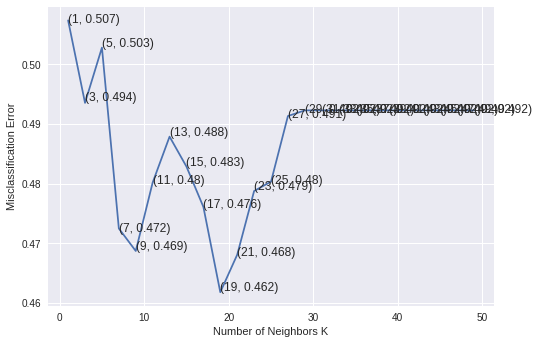

the misclassification error for each k value is :  [0.507 0.494 0.503 0.472 0.469 0.48  0.488 0.483 0.476 0.462 0.468 0.479
 0.48  0.491 0.492 0.492 0.492 0.492 0.492 0.492 0.492 0.492 0.492 0.492
 0.492]


In [84]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []
my_cv = [(train,test) for train, test in TimeSeriesSplit(n_splits=10).split(X_train2)]
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train2, y_train, cv = my_cv, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", (np.round(MSE,3)))

### Best 'k' = 19

In [85]:
k = 19
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train2,y_train)
pred = knn.predict(X_test2)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
x = knn.predict(X_train2)
tr_acc = accuracy_score(y_train, x, normalize=True) * float(100)
print('\n****Train accuracy for k = {} is {:.2f}'.format(k,tr_acc))
print('\n****Test accuracy for k = {} is {:.2f}'.format(k,acc))


****Train accuracy for k = 19 is 48.40

****Test accuracy for k = 19 is 53.97


## Generate the confusion matrix 

In [0]:
print(confusion_matrix(y_test, pred))

[[   0 1608]
 [   0 1392]]


# Preparing Data using Word2Vec for K-NN

In [0]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
train_sent=[]
for sent in X_train:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    train_sent.append(filtered_sentence)
    

In [0]:

i=0
test_sent=[]
for sent in X_test:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    test_sent.append(filtered_sentence)

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

w2v_model1=gensim.models.Word2Vec(train_sent,min_count=5,size=50, workers=4)    
w2v_model2=gensim.models.Word2Vec(test_sent,min_count=5,size=50, workers=4) 


## K-NN using Average Word2Vec

In [54]:
#AVG-W2V
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in train_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model1.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

7000
50


In [55]:
#AVG-W2V
sent_vectors2 = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model2.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors2.append(sent_vec)
print(len(sent_vectors2))
print(len(sent_vectors2[0]))

3000
50


In [0]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler(with_mean=False) 
X_train3 = sc.fit_transform(sent_vectors)
X_test3 = sc.transform(sent_vectors2)


The optimal number of neighbors is 31.


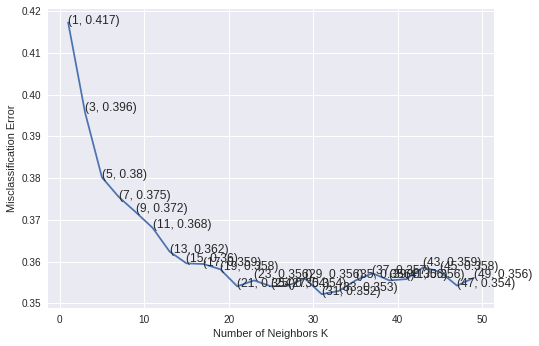

the misclassification error for each k value is :  [0.417 0.396 0.38  0.375 0.372 0.368 0.362 0.36  0.359 0.358 0.354 0.356
 0.354 0.354 0.356 0.352 0.353 0.356 0.357 0.356 0.356 0.359 0.358 0.354
 0.356]


In [57]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []
my_cv = [(train,test) for train, test in TimeSeriesSplit(n_splits=10).split(X_train3)]
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train3, y_train, cv = my_cv, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", (np.round(MSE,3)))

### Best 'k' = 31

In [58]:
k = 31
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train3,y_train)
pred = knn.predict(X_test3)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
x = knn.predict(X_train3)
tr_acc = accuracy_score(y_train, x, normalize=True) * float(100)
print('\n****Train accuracy for k = {} is {:.2f}'.format(k,tr_acc))
print('\n****Test accuracy for k = {} is {:.2f}'.format(k,acc))


****Train accuracy for k = 31 is 68.73

****Test accuracy for k = 31 is 51.50


## Generate the confusion matrix 

In [59]:
print(confusion_matrix(y_test, pred))

[[1428  133]
 [1322  117]]


# K-NN using Word2Vec-Tfidf

In [0]:
#TF-IDF

tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_train)
tfidf_feat = tf_idf_vect.get_feature_names()
 # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

train_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in train_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum = 0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model1.wv[word]
            # obtain the tf_idf of a word in a sentence/review
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
            
            
        except:
            pass

    sent_vec /= weight_sum
    #print(np.isnan(np.sum(sent_vec)))

    train_vectors.append(sent_vec)
    row += 1

In [0]:
#TF-IDF

tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(X_test)
tfidf_feat = tf_idf_vect.get_feature_names()
 # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

test_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in test_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum = 0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model2.wv[word]
            # obtain the tf_idf of a word in a sentence/review
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
            
            
        except:
            pass

    sent_vec /= weight_sum
    #print(np.isnan(np.sum(sent_vec)))

    test_vectors.append(sent_vec)
    row += 1

In [0]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler(with_mean=False) 
X_train4 = sc.fit_transform(train_vectors)
X_test4 = sc.transform(test_vectors)


The optimal number of neighbors is 35.


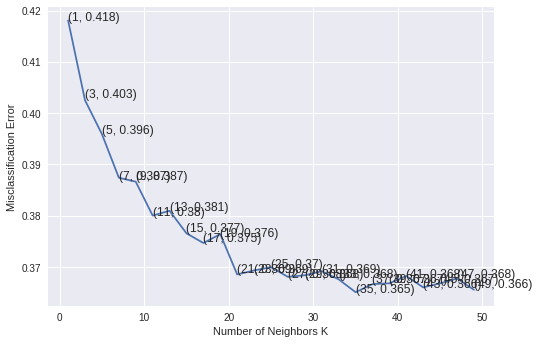

the misclassification error for each k value is :  [0.418 0.403 0.396 0.387 0.387 0.38  0.381 0.377 0.375 0.376 0.369 0.369
 0.37  0.368 0.368 0.369 0.368 0.365 0.367 0.367 0.368 0.366 0.367 0.368
 0.366]


In [0]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []
my_cv = [(train,test) for train, test in TimeSeriesSplit(n_splits=10).split(X_train4)]
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train4, y_train, cv = my_cv, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", (np.round(MSE,3)))

### Best 'k' = 35

In [76]:
k = 35
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train4,y_train)
pred = knn.predict(X_test4)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
x = knn.predict(X_train4)
tr_acc = accuracy_score(y_train, x, normalize=True) * float(100)
print('\n****Train accuracy for k = {} is {:.2f}'.format(k,tr_acc))
print('\n****Test accuracy for k = {} is {:.2f}'.format(k,acc))


****Train accuracy for k = 35 is 71.41

****Test accuracy for k = 35 is 47.37


## Generate the confusion matrix 

In [0]:
print(confusion_matrix(y_test, pred))

[[ 105 1503]
 [  76 1316]]


In [0]:
import plotly.tools as tls
tls.set_credentials_file(username='kv007', api_key='MSfBc0Jqh4Vq99anlb0p')

# Conclusion

In [ ]:
trace = go.Table(
    header=dict(values=['Algorithm', 'Model', 'Best Hyperparameter(K)','Train metric','Test metric']),
    cells=dict(values=[['Bag of words', 'Tf-idf', 'Average Word2Vec', 'Tf-idf Word2Vec'],
                       ['K-NN', 'K-NN', 'K-NN', 'K-NN'],
                       [21,19,31,35],
                       ['accuracy(68.73%)','accuracy(48.40%)','accuracy(77.46%)','accuracy(71.41%)'],
                      ['accuracy(60.70%)','accuracy(46.40%)','accuracy(46.47%)','accuracy(47.37%)']]))

data = [trace] 
py.iplot(data, filename = 'Conclusion')